In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
df=pd.read_csv("C:\\Users\\hp\\Downloads\\nlpanalytics\\data\\cleaned_nlp_data.csv")
df.head()

,Text,Sentiment
0,i love this product,Positive
1,the service was terrible,Negative
2,this movie is amazing,Positive
3,im so disappointed with their customer support,Negative
4,just had the best meal of my life,Positive


In [5]:
#splitting the data
X=df["Text"]
y=df["Sentiment"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
#vectorizing the text data using Tf-IDF(converting text to numeric vectors)
vectorizer=TfidfVectorizer(
    stop_words="english",
    ngram_range=(1,2),
    max_df=0.9,
    min_df=2,
    max_features=3000)
                    
X_train_tfidf=vectorizer.fit_transform(X_train)
X_test_tfidf=vectorizer.transform(X_test)


In [9]:
#training the model
model=LogisticRegression()
model.fit(X_train_tfidf,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
#predict
y_pred=model.predict(X_test_tfidf)

In [12]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))


Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

    Negative       0.56      1.00      0.71         5
    Positive       1.00      0.73      0.85        15

    accuracy                           0.80        20
   macro avg       0.78      0.87      0.78        20
weighted avg       0.89      0.80      0.81        20



In [13]:
nb_model=MultinomialNB()
nb_model.fit(X_train_tfidf,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [14]:
y_pred_nb=nb_model.predict(X_test_tfidf)

In [15]:
print("Naive Bayes Accuracy:",accuracy_score(y_test,y_pred_nb))
print("\nClassification Report(Naive Bayes):\n",classification_report(y_test,y_pred_nb))

Naive Bayes Accuracy: 0.8

Classification Report(Naive Bayes):
               precision    recall  f1-score   support

    Negative       0.56      1.00      0.71         5
    Positive       1.00      0.73      0.85        15

    accuracy                           0.80        20
   macro avg       0.78      0.87      0.78        20
weighted avg       0.89      0.80      0.81        20



In [16]:
cm_nb=confusion_matrix(y_test,y_pred_nb)

In [17]:
labels=['Negative','Postive']

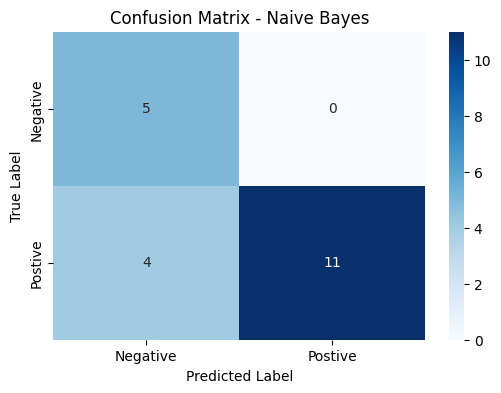

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_nb,annot=True,fmt="d",cmap="Blues",xticklabels=labels,yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [19]:
cm_log=confusion_matrix(y_test,y_pred)

In [20]:
labels=['Negative','Postive']

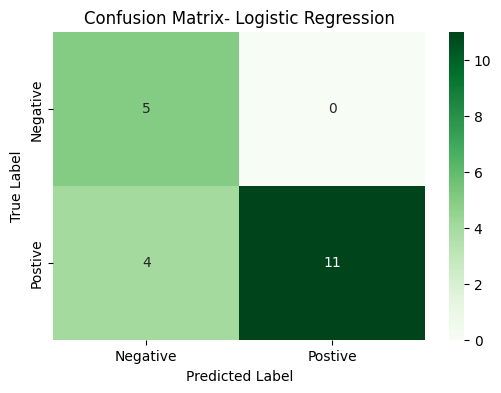

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_log,annot=True,fmt="d",cmap="Greens",xticklabels=labels,yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix- Logistic Regression")
plt.show()

In [22]:
import pickle
with open("C:\\Users\\hp\\Downloads\\nlpanalytics\\notebooks\\sentiment_model.pkl",'wb') as f:
    pickle.dump(nb_model,f)

In [23]:
with open("C:\\Users\\hp\\Downloads\\nlpanalytics\\notebooks\\tfidf_vectorizer.pkl",'wb')as f:
    pickle.dump(vectorizer,f)

In [24]:
print(vectorizer.get_feature_names_out())


['absolutely' 'amazing' 'arrived' 'arrived damaged' 'awful' 'awful going'
 'bands' 'best' 'book' 'broke' 'concert' 'confusing' 'customer'
 'customer service' 'customer support' 'damaged' 'damaged disappointed'
 'difficult' 'disappointed' 'disappointed customer' 'disappointed product'
 'experience' 'experience technical' 'experience theme' 'extremely'
 'extremely disappointed' 'fantastic' 'favorite' 'finish' 'food'
 'food restaurant' 'frustrating' 'frustrating experience' 'frustratingly'
 'frustratingly slow' 'fun' 'going' 'good' 'goto' 'highly'
 'highly recommended' 'hotel' 'hotel staff' 'im' 'im disappointed'
 'im extremely' 'impressed' 'improvement' 'incredible'
 'incredible experience' 'just' 'listening' 'listening song' 'loading'
 'loading speed' 'love' 'loved' 'loved movie' 'masterpiece' 'mediocre'
 'mediocre special' 'mood' 'movie' 'movie amazing' 'movie fantastic'
 'navigate' 'needs' 'needs improvement' 'new' 'new favorite' 'ordered'
 'ordered arrived' 'park' 'park fun' 'playlis